# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
#def build_mlp():
"""
Build your own model
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = 0.01
EPOCHS = 30
BATCH_SIZE = 512
MOMENTUM = 0.9



In [7]:
#results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
results = {}
for name in ['SGD', 'RMSprop', 'AdaGrad', 'Adam']:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with optimizer: {name}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    if name == 'SGD':
        optimizer = keras.optimizers.SGD()
    elif name == 'RMSprop':
        optimizer = keras.optimizers.RMSprop()
    elif name == 'AdaGrad':
        optimizer = keras.optimizers.Adagrad()
    else:
        optimizer = keras.optimizers.Adam()
        
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test))
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = f"exp-optimizer-{name}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with optimizer: SGD
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Us

50000/50000 [==============================] - 7s 140us/step - loss: 1.5954 - acc: 0.4298 - val_loss: 1.6530 - val_acc: 0.4044
Epoch 11/30
50000/50000 [==============================] - 7s 143us/step - loss: 1.5647 - acc: 0.4391 - val_loss: 1.6721 - val_acc: 0.4047
Epoch 12/30
50000/50000 [==============================] - 7s 146us/step - loss: 1.5463 - acc: 0.4500 - val_loss: 1.5421 - val_acc: 0.4486
Epoch 13/30
50000/50000 [==============================] - 7s 144us/step - loss: 1.5250 - acc: 0.4552 - val_loss: 1.5400 - val_acc: 0.4517
Epoch 14/30
50000/50000 [==============================] - 7s 142us/step - loss: 1.4913 - acc: 0.4653 - val_loss: 1.5386 - val_acc: 0.4534
Epoch 15/30
50000/50000 [==============================] - 7s 145us/step - loss: 1.4824 - acc: 0.4693 - val_loss: 1.5982 - val_acc: 0.4376
Epoch 16/30
50000/50000 [==============================] - 7s 145us/step - loss: 1.4470 - acc: 0.4844 - val_loss: 1.5369 - val_acc: 0.4522
Epoch 17/30
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 160us/step - loss: 2.0036 - acc: 0.2777 - val_loss: 1.8423 - val_acc: 0.3382
Epoch 2/30
50000/50000 [==============================] - 8s 155us/step - loss: 1.7665 - acc: 0.3711 - val_loss: 1.7578 - val_acc: 0.3647
Epoch 3/30
50000/50000 [==============================] - 8s 153us/step - loss: 1.6725 - acc: 0.4049 - val_loss: 1.6093 - val_acc: 0.4254
Epoch 4/30
50000/50000 [==============================] - 8s 155us/step - loss: 1.5941 - acc: 0.4308 - val_loss: 1.6186 - val_acc: 0.4188
Epoch 5/30
50000/50000 [==============================] - 8s 156us/step - loss: 1.5509 - acc: 0.4483 - val_loss: 1.5260 - val_acc: 0.4579
Epoch 6/30
50000/50000 [==============================] - 8s 154us/step - loss: 1.5028 - acc: 0.4627 - val_loss: 1.4987 - val_acc: 0.4684
Epoch 7/30
50000/50000 [==============================] - 8s 154us/step - loss: 1.4700 - acc: 0.4771 - val_loss: 1.4845 - 

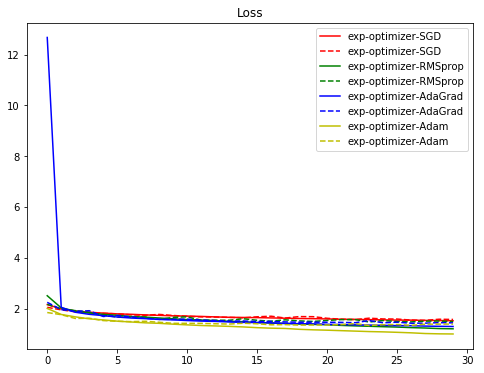

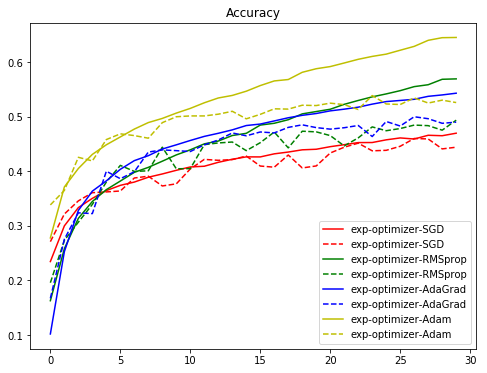

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()